In [ ]:
# QUESTION 1
# This allows you to upload files (e.g., a dataset) from your local computer into Google Colab.
# A file browser will pop up so you can select the file you want to upload.
from google.colab import files
uploaded = files.upload()

Saving Loan_Train.csv to Loan_Train (1).csv


In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Loan_Train.csv')

# Preview the first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Display the number of rows and columns in the dataset
print("Shape of the dataset:", df.shape)

# Print data types and the count of non-null values for each column
print("\nData types and non-null counts:\n")
print(df.info())

# Display summary statistics (mean, count, unique values, etc.) for all columns
print("\nSummary statistics:\n")
print(df.describe(include='all'))

Shape of the dataset: (614, 13)

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Summary statistics:

         Loan_ID Ge

In [ ]:

# Check for missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())


Missing values per column:

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Replace 'Loan_Status' with the correct column name if different
print("\nTarget class distribution:\n")
print(df['Loan_Status'].value_counts(normalize=True) * 100)


Target class distribution:

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


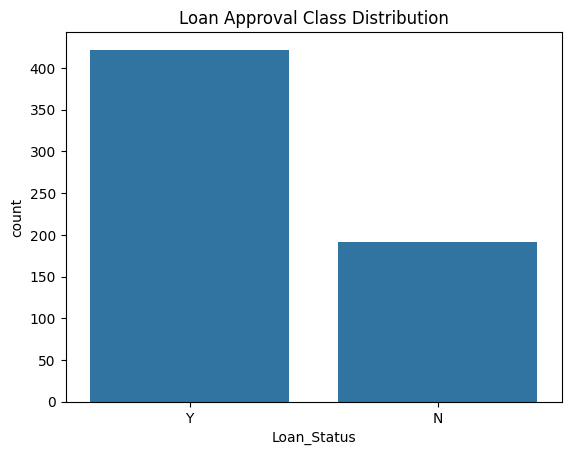

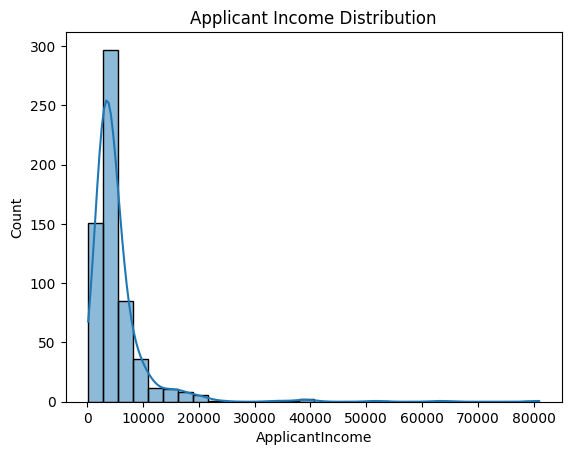

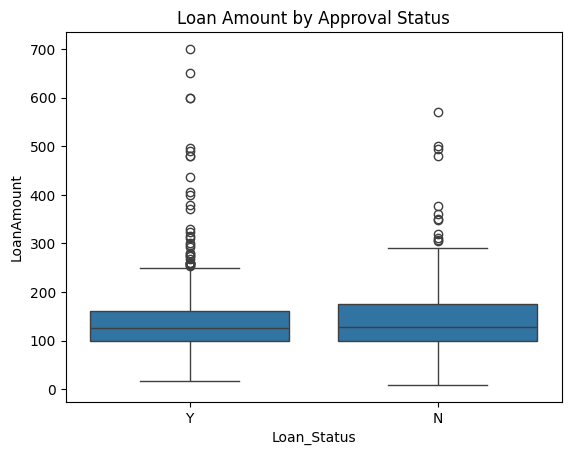

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of loan approval status to check class balance
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Approval Class Distribution')
plt.show()

# Plot the distribution of applicant income to understand its range and skewness
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title('Applicant Income Distribution')
plt.show()

# Plot a boxplot to compare loan amounts for approved vs. not approved loans
sns.boxplot(data=df, x='Loan_Status', y='LoanAmount')
plt.title('Loan Amount by Approval Status')
plt.show()

In [ ]:
# Step 4: Data Cleaning and Preprocessing

# First, we handle missing values in the dataset

# For categorical columns, we fill missing values with the most frequent value (mode)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# For numerical columns, we use the median to avoid distortion from outliers
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Credit_History is binary, so we fill missing values with mode
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Finally, let's confirm that all missing values are handled
print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
# Step 5 : Encode Categorical Variables Safely

from sklearn.preprocessing import LabelEncoder

# Make a copy of the cleaned DataFrame
df_encoded = df.copy()

# Columns to label encode
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding only if the column exists
for col in label_cols:
    if col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Columns to one-hot encode
one_hot_cols = ['Property_Area', 'Dependents']

# Apply one-hot encoding only to columns that still exist
for col in one_hot_cols:
    if col in df_encoded.columns:
        df_encoded = pd.get_dummies(df_encoded, columns=[col])

# Preview the result
df_encoded.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,False,True,True,False,False,False
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False,False,True,False,False
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,False,True,True,False,False,False
3,LP001006,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,True,True,False,False,False
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,True,True,False,False,False


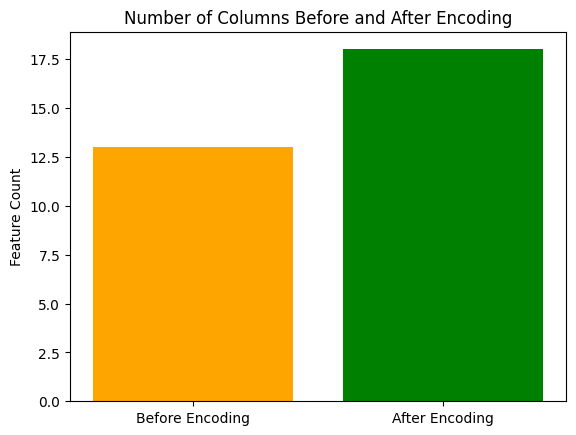

In [ ]:
#STEP 5 VISUAL
# This bar chart helps us understand how encoding changes the number of features (columns) in the dataset.
# 'Before Encoding' shows original features, 'After Encoding' includes extra columns from one-hot encoding.
plt.bar(['Before Encoding', 'After Encoding'], [df.shape[1], df_encoded.shape[1]], color=['orange', 'green'])
plt.title('Number of Columns Before and After Encoding')
plt.ylabel('Feature Count')
plt.show()

In [ ]:

# Step 6: Split the dataset into training and testing sets  (Assignment Task 6)
from sklearn.model_selection import train_test_split

# Q6.1: Drop Loan_ID if it’s still there
if 'Loan_ID' in df_encoded.columns:
    df_encoded = df_encoded.drop('Loan_ID', axis=1)

# Q6.2: Separate the input features (X) and target variable (y)
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']

# Q6.3: Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q6.4: Show the sizes of each split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (491, 16)
Test set size: (123, 16)


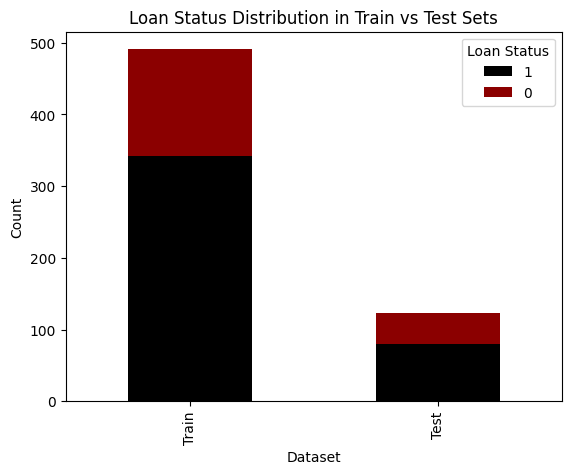

In [ ]:
#Step 6 Visual
# The purpose of this chart is to check that the training and test sets have a similar number of approved (Y) and not approved (N) loans
# Here, 0 means the loan was not approved (N) and 1 means the loan was approved (Y).
# This helps make sure the model learns and tests fairly on balanced data.
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()
df_plot = pd.DataFrame({'Train': train_counts, 'Test': test_counts})

# Stacked bar chart
df_plot.T.plot(kind='bar', stacked=True, color=['black', 'darkred'])
plt.title('Loan Status Distribution in Train vs Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [ ]:
# Conclusion:
# The chart shows that both the training and test sets have a similar mix of approved (1) and not approved (0) loans.
# This balance is important because it helps the model learn patterns properly and perform well when making predictions.

In [ ]:
# Step 7: Train the models (Assignment Task 7)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Q7.1: Impute missing values in training and testing sets
# Use the median strategy for numerical features
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Scale the features to improve Logistic Regression performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Q7.2: Train Logistic Regression on scaled data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Q7.3: Train Decision Tree on unscaled data (scaling not needed for trees)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_imputed, y_train) # Use imputed data for Decision Tree as well

# Q7.4: Confirm that both models have been trained
print("Both models have been trained successfully.")

Both models have been trained successfully.


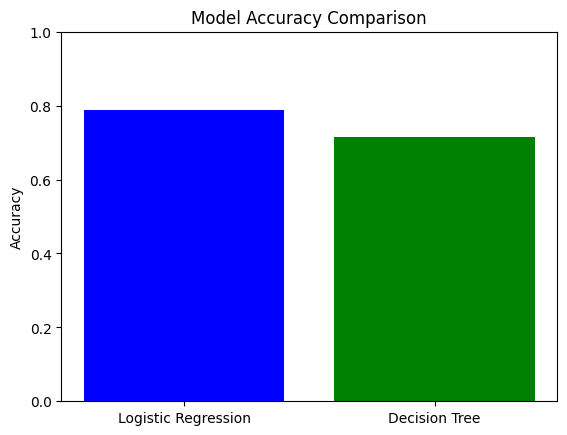

In [ ]:
# STEP 7 VISUAL
# This bar chart shows the accuracy of both models: Logistic Regression and Decision Tree.
# Accuracy means how many predictions the model got right out of all the test examples.
# By looking at the chart, we can quickly see which model performed better overall.
# This helps us choose the better model based on simple, easy-to-understand results.
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, log_reg.predict(X_test_scaled))
dt_acc = accuracy_score(y_test, dt_clf.predict(X_test_imputed))

plt.bar(["Logistic Regression", "Decision Tree"], [logreg_acc, dt_acc], color=["blue", "green"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

In [ ]:
#Conclusion
# In this case, Logistic Regression has higher accuracy than the Decision Tree,
# so it did a better job overall at making correct predictions on the test data.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Q8.0: Scale features for Logistic Regression only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and transform
X_test_scaled = scaler.transform(X_test)        # Transform test data

# Q8.1: Train Logistic Regression on scaled data
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Q8.2: Train Decision Tree on unscaled data (no scaling needed)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Q8.3: Make predictions with Logistic Regression using scaled test data
log_reg_preds = log_reg.predict(X_test_scaled)

# Q8.4: Make predictions with Decision Tree using unscaled test data
dt_preds = dt_clf.predict(X_test)

# Q8.5: Define a function to print all evaluation metrics
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Q8.6: Evaluate Logistic Regression performance
evaluate_model("Logistic Regression", y_test, log_reg_preds)

# Q8.7: Evaluate Decision Tree performance
evaluate_model("Decision Tree", y_test, dt_preds)


Model: Logistic Regression
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Model: Decision Tree
Accuracy: 0.7073170731707317
Precision: 0.7558139534883721
Recall: 0.8125
F1 Score: 0.7831325301204819
Confusion Matrix:
 [[22 21]
 [15 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.51      0.55        43
           1       0.76      0.81      0.78        80

    accuracy                           0.71       123
   macro avg       0.68      0.66      0.67       123
weighted avg       0.

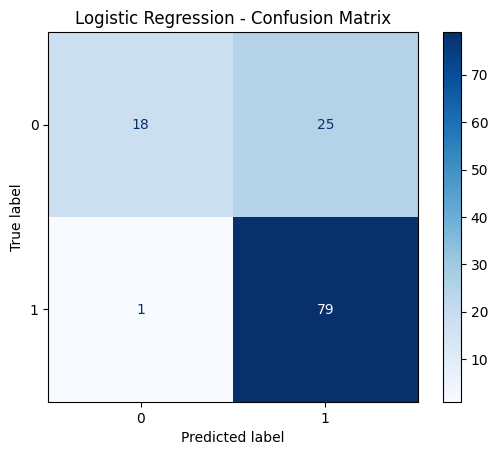

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


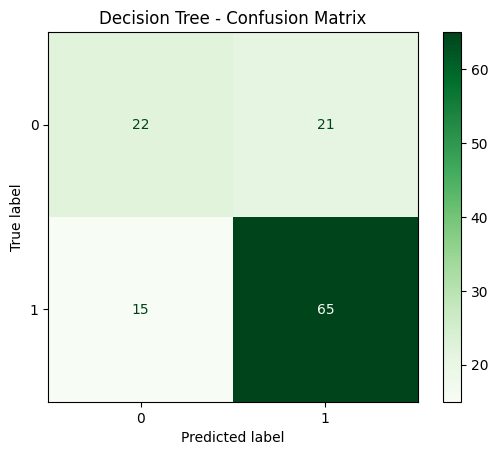

In [ ]:
#STEP 8 VISUALS
# Visualizing the Confusion Matrix for both Logistic Regression and Decision Tree models.
# This allows us to compare how well each model performs in terms of classification.
# Specifically, we can observe the number of true positives, true negatives, false positives, and false negatives.
# A higher count on the diagonal (top-left and bottom-right) indicates better classification accuracy.
# Comparing both matrices helps us identify which model handles classification errors more effectively.

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_clf, X_test_imputed, y_test, cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [ ]:
# Conclusion of Confusion Matrices:
# - Logistic Regression: True Positives (Bottom Right) = 79, True Negatives (Top Left) = 18
# - Decision Tree:        True Positives (Bottom Right) = 65, True Negatives (Top Left) = 23
#
#  Logistic Regression correctly identifies more positive cases (79 vs 65), meaning it's better at predicting the majority class.
#  Decision Tree correctly identifies more negative cases (23 vs 18), meaning it has slightly better detection of the minority class.
#
#  Trade-off: Logistic Regression may be more suitable if minimizing false negatives is critical (e.g., catching more actual approvals),
# while Decision Tree may be preferable if minimizing false positives is more important (e.g., avoiding wrong approvals).

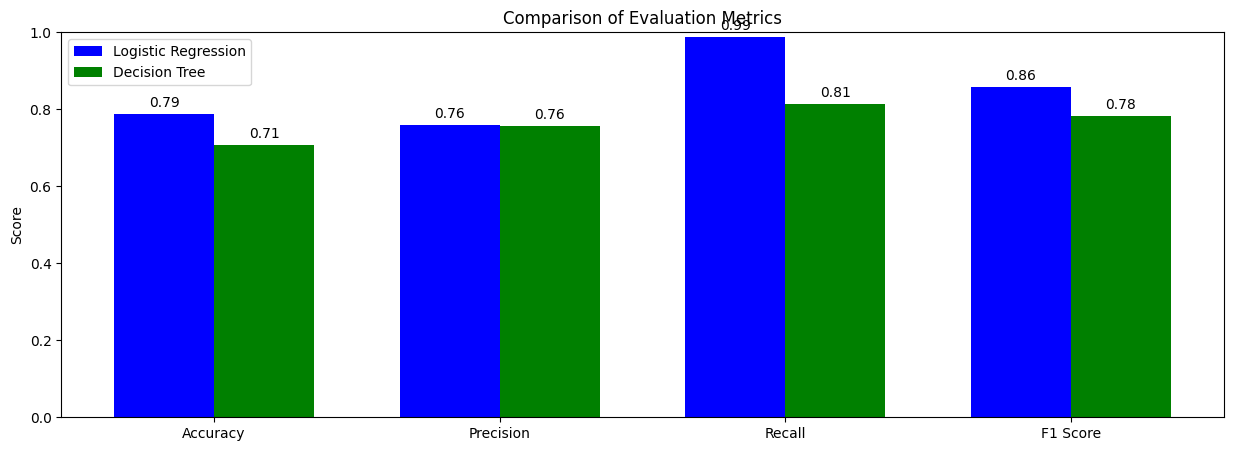

In [ ]:
# STEP 8 VISUALS
# Bar Chart Comparing Metrics (Accuracy, Precision, Recall, F1 Score)
# This bar chart compares key evaluation metrics—Accuracy, Precision, Recall, and F1 Score—for both models.
# It helps us quickly see which model performs better on each metric.
# Accuracy shows overall correctness, Precision shows how many predicted positives were correct,
# Recall shows how many actual positives were found, and F1 Score balances Precision and Recall.
# Comparing these helps us understand each model’s strengths and weaknesses.
import numpy as np

# Calculate metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_reg_scores = [
    accuracy_score(y_test, log_reg_preds),
    precision_score(y_test, log_reg_preds),
    recall_score(y_test, log_reg_preds),
    f1_score(y_test, log_reg_preds)
]
dt_scores = [
    accuracy_score(y_test, dt_preds),
    precision_score(y_test, dt_preds),
    recall_score(y_test, dt_preds),
    f1_score(y_test, dt_preds)
]

x = np.arange(len(metrics))  # metric labels locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width/2, log_reg_scores, width, label='Logistic Regression', color='blue')
rects2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree', color='green')

ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Attach scores above bars
def attach_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3), textcoords='offset points', ha='center', va='bottom')
attach_values(rects1)
attach_values(rects2)

plt.show()

In [ ]:
# Conclusion:
# The bar chart shows that Logistic Regression has higher Accuracy and Recall, meaning it catches more true positive cases.
# Decision Tree has slightly better Precision, indicating fewer false positives.
# Logistic Regression’s higher F1 Score suggests a better overall balance between Precision and Recall.
# This comparison helps decide which model is better depending on whether catching positives or avoiding false positives is more important.

In [ ]:
# Step 9: Final testing on the reserved test set (Assignment Task 9)

# We already used X_test and y_test for evaluation,
# so this serves as our reserved test set for final model comparison.

# No new code needed here — Q9 is covered by our evaluation step above.
print("Step 9 complete: Models tested on reserved test set.")

Step 9 complete: Models tested on reserved test set.



#Step 10
#Purpose:
# This Gradio application allows users to input key loan application details
# and compare predictions from two trained machine learning models:
# - Logistic Regression (`log_reg`)
# - Decision Tree Classifier (`dt_clf`)

#  Users provide inputs like income, credit history, property area, etc.
#  The app displays whether the loan would be "Approved" or "Rejected"

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np # Needed for SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer # Needed for imputer

# Assume 'log_reg', 'dt_clf', 'scaler', 'imputer', 'le', and 'X_train' are available from previous steps
# If not, you would need to load models/scalers/imputers and define le.classes_ and X_train.columns

# Define the prediction function
def predict_loan_status_app(ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Gender, Married, Dependents, Education, Self_Employed, Property_Area):
    # Create a DataFrame from user inputs
    input_data = pd.DataFrame([[ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Gender, Married, Dependents, Education, Self_Employed, Property_Area]],
                              columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

    # Apply the same preprocessing steps as the training data

    # Label encode categorical columns
    label_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
    for col in label_cols:
        # Use the fitted label encoder, handle potential unseen values gracefully
        if col in input_data.columns and input_data[col].iloc[0] in le.classes_:
             input_data[col] = le.transform(input_data[col])
        else:
             # Handle unseen labels - a simple approach is to use a default or raise an error
             # For this example, we'll assume valid inputs based on training data categories
             pass


    # One-hot encode categorical columns
    one_hot_cols = ['Property_Area', 'Dependents']
    for col in one_hot_cols:
        if col in input_data.columns:
            input_data = pd.get_dummies(input_data, columns=[col])

    # Align columns with training data - important for consistent feature sets
    # Add missing dummy columns with 0 and reorder columns
    train_cols = X_train.columns # Assuming X_train from previous steps is available
    for col in train_cols:
        if col not in input_data.columns:
            input_data[col] = 0

    # Ensure the order of columns in input_data matches train_cols
    input_data = input_data[train_cols]

    # Impute missing values - use the fitted imputer
    input_data_imputed = imputer.transform(input_data) # Assuming imputer from previous steps is available


    # Scale the data for Logistic Regression using the fitted scaler
    input_data_scaled = scaler.transform(input_data_imputed) # Assuming scaler from previous steps is available

    # Make predictions
    log_reg_prediction = log_reg.predict(input_data_scaled)[0] # Assuming log_reg from previous steps is available
    dt_prediction = dt_clf.predict(input_data_imputed)[0] # Assuming dt_clf from previous steps is available


    # Convert predictions back to original labels (0=Rejected, 1=Approved)
    log_reg_status = 'Approved' if log_reg_prediction == 1 else 'Rejected'
    dt_status = 'Approved' if dt_prediction == 1 else 'Rejected'


    return log_reg_status, dt_status

# Define input components
input_components = [
    gr.Number(label="Applicant Income"),
    gr.Number(label="Coapplicant Income"),
    gr.Number(label="Loan Amount"),
    gr.Number(label="Loan Amount Term (in months)"),
    gr.Radio(choices=[0.0, 1.0], label="Credit History (0: No, 1: Yes)"),
    gr.Radio(choices=['Male', 'Female'], label="Gender"),
    gr.Radio(choices=['No', 'Yes'], label="Married"),
    gr.Dropdown(choices=['0', '1', '2', '3+'], label="Dependents"),
    gr.Radio(choices=['Graduate', 'Not Graduate'], label="Education"),
    gr.Radio(choices=['No', 'Yes'], label="Self Employed"),
    gr.Radio(choices=['Urban', 'Rural', 'Semiurban'], label="Property Area"),
]

# Define output components
output_components = [
    gr.Textbox(label="Logistic Regression Prediction"),
    gr.Textbox(label="Decision Tree Prediction"),
]

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_loan_status_app,
    inputs=input_components,
    outputs=output_components,
    title="Loan Status Prediction Comparison",
    description="Enter applicant details to predict loan approval status using Logistic Regression and Decision Tree models."
)

# Launch the app
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cebbac2652c24a63b0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
